#03_Machine_Learning_Basico
Este notebook explora modelos de clasificación y regresión con Scikit-learn usando datasets clásicos como Wine y Diabetes. Se incluyen métricas, validación y comparación.


**Estudiantes:**  David Francisco Alvarez,  Macerlo Xavier Castillo, Alejandro Sebastian Casto, Lady Anahi Garces
Daniela Estefania Pezantez, María Mercedes Vera.

**Materia:** Inteligencia Artificial  
**Actividad:** 1  
**Docente:** Gladys Villegas, PhD(c)

In [20]:
# Verificar versión de Python y GPU
import sys
print("Versión de Python:", sys.version)

import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías necesarias
!pip install seaborn plotly --quiet

# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import warnings
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')

# Estilo visual
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

Versión de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
GPU disponible: []
Entorno configurado correctamente en Google Colab


##Cargar el dataset

El dataset `Wine` contiene información química de distintos tipos de vino. A continuación se carga y se transforma en un DataFrame.
Para el caso de regresión se ocuapa el dataset `Diabetes`.

In [21]:
# Datasets
wine = load_wine(as_frame=True)
df_clf = wine.frame
print("DataFrame Clasificacion Wine:")
print(df_clf.head())
diabetes = load_diabetes(as_frame=True)
df_reg = diabetes.frame
print("\nDataFrame Regresion Diabetes:")
print(df_reg.head())

DataFrame Clasificacion Wine:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines 

In [22]:
# Clasificación - Wine
X_clf = df_clf.drop('target', axis=1)
y_clf = df_clf['target']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# Regresión - Diabetes
X_reg = df_reg.drop('target', axis=1)
y_reg = df_reg['target']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Escalado (muy importante para algunos modelos)
scaler_clf = StandardScaler()
Xc_train_scaled = scaler_clf.fit_transform(Xc_train)
Xc_test_scaled = scaler_clf.transform(Xc_test)

scaler_reg = StandardScaler()
Xr_train_scaled = scaler_reg.fit_transform(Xr_train)
Xr_test_scaled = scaler_reg.transform(Xr_test)

# Verificación de formas
print(f"Clasificación train/test: {Xc_train.shape}/{Xc_test.shape}")
print(f"Regresión train/test: {Xr_train.shape}/{Xr_test.shape}")

Clasificación train/test: (124, 13)/(54, 13)
Regresión train/test: (309, 10)/(133, 10)


## Entrenamiento de Modelos de Clasificación

Entrenamos tres modelos clásicos de clasificación usando el dataset Wine:
- Regresión Logística
- K-Nearest Neighbors (KNN) k=5
- Árbol de Decisión

Estos modelos se entrenan con los datos escalados. Posteriormente, evaluamos el rendimiento con accuracy y reporte de clasificación.


In [23]:
# Inicializar modelos
modelos_clf = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
}

# Entrenar y evaluar
from sklearn.metrics import accuracy_score, classification_report

for nombre, modelo in modelos_clf.items():
    modelo.fit(Xc_train_scaled, yc_train)
    pred = modelo.predict(Xc_test_scaled)
    acc = accuracy_score(yc_test, pred)
    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print("Reporte de Clasificación:")
    print(classification_report(yc_test, pred))


Modelo: Regresión Logística
Accuracy: 0.9815
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Modelo: K-Nearest Neighbors
Accuracy: 0.9630
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


Modelo: Árbol de Decisión
Accuracy: 0.9630
Reporte de Clasificación:
              precision 

**Tabla y Gráfico de comparación**

Tabla Comparativa de Accuracy:



,Modelo,Accuracy
0,Regresión Logística,0.9815
1,K-Nearest Neighbors,0.9630
2,Árbol de Decisión,0.9630


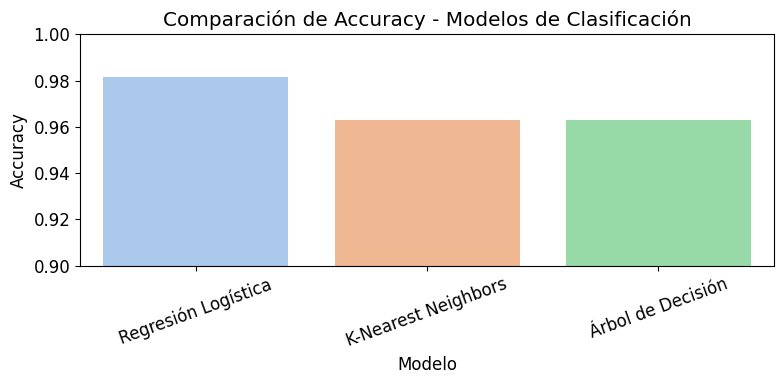

In [24]:
# Comparación de Accuracy entre modelos de clasificación

# Crear diccionario con resultados
resultados_clasificacion = {
    'Modelo': ['Regresión Logística', 'K-Nearest Neighbors', 'Árbol de Decisión'],
    'Accuracy': [0.9815, 0.9630, 0.9630]
}

# Convertir a DataFrame
df_resultados_clf = pd.DataFrame(resultados_clasificacion)

# Mostrar tabla
print("Tabla Comparativa de Accuracy:\n")
display(df_resultados_clf)

# Gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(data=df_resultados_clf, x='Modelo', y='Accuracy', palette='pastel')
plt.ylim(0.9, 1)
plt.title('Comparación de Accuracy - Modelos de Clasificación')
plt.ylabel('Accuracy')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


**Validación cruzada para clasificación**

Para evaluar la robustez de los modelos de clasificación, aplicamos validación cruzada con 5 particiones (k-fold). Esto permite obtener una métrica más generalizable al evitar que el modelo se sobreentrene sobre una única división de datos.


In [25]:
modelos_cv = {
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Árbol de Decisión': DecisionTreeClassifier()
}
print("Resultados de validación cruzada (5 folds):\n")

# Ejecutar validación cruzada con 5 folds
for nombre, modelo in modelos_cv.items():
    scores = cross_val_score(modelo, Xc_train_scaled, yc_train, cv=5, scoring='accuracy')
    print(f"Modelo: {nombre}")
    print(f"   Accuracy promedio: {scores.mean():.4f}")
    print(f"   Desviación estándar: {scores.std():.4f}\n")


Resultados de validación cruzada (5 folds):

Modelo: Regresión Logística
   Accuracy promedio: 0.9840
   Desviación estándar: 0.0196

Modelo: K-Nearest Neighbors
   Accuracy promedio: 0.9520
   Desviación estándar: 0.0392

Modelo: Árbol de Decisión
   Accuracy promedio: 0.9190
   Desviación estándar: 0.0514



**Optimización**

In [26]:
# 1. Regresión Logística
param_log = {'C': [0.01, 0.1, 1, 10, 100]}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_log, cv=5)
grid_log.fit(Xc_train_scaled, yc_train)
best_log = grid_log.best_estimator_
y_pred_log = best_log.predict(Xc_test_scaled)
acc_log = accuracy_score(yc_test, y_pred_log)
print(f"Regresión Logística - Mejor C: {grid_log.best_params_}")
print(f"  Accuracy: {acc_log:.4f}")

# 2. K-Nearest Neighbors
param_knn = {'n_neighbors': list(range(1, 11))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(Xc_train_scaled, yc_train)
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(Xc_test_scaled)
acc_knn = accuracy_score(yc_test, y_pred_knn)
print(f"KNN - Mejor n_neighbors: {grid_knn.best_params_}")
print(f"  Accuracy: {acc_knn:.4f}")

# 3. Árbol de Decisión
param_tree = {'max_depth': [2, 4, 6, 8, 10]}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_tree, cv=5)
grid_tree.fit(Xc_train_scaled, yc_train)
best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(Xc_test_scaled)
acc_tree = accuracy_score(yc_test, y_pred_tree)
print(f"Árbol - Mejor max_depth: {grid_tree.best_params_}")
print(f"  Accuracy: {acc_tree:.4f}")


Regresión Logística - Mejor C: {'C': 100}
  Accuracy: 0.9815
KNN - Mejor n_neighbors: {'n_neighbors': 7}
  Accuracy: 0.9815
Árbol - Mejor max_depth: {'max_depth': 4}
  Accuracy: 0.9630


## Modelos de Regresión

Aplicamos tres modelos de regresión sobre el dataset de Diabetes: Regresión Lineal, Árbol de Decisión y K-Nearest Neighbors. Usamos el error cuadrático medio (MSE) y el R² como métricas de evaluación.


In [27]:
# Inicializar modelos de regresión
modelos_reg = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Entrenar y evaluar modelos
for nombre, modelo in modelos_reg.items():
    modelo.fit(Xr_train_scaled, yr_train)
    pred = modelo.predict(Xr_test_scaled)
    mse = mean_squared_error(yr_test, pred)
    r2 = r2_score(yr_test, pred)
    print(f"\nModelo: {nombre}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.4f}")


Modelo: Regresión Lineal
Mean Squared Error (MSE): 2821.75
R² Score: 0.4773

Modelo: Árbol de Decisión
Mean Squared Error (MSE): 5686.60
R² Score: -0.0534

Modelo: K-Nearest Neighbors
Mean Squared Error (MSE): 3277.74
R² Score: 0.3928


**Comparación de Resultados - Modelos de Regresión**

A continuación se muestra una tabla y un gráfico de barras que comparan el rendimiento de los modelos de regresión usando las métricas MSE (Error Cuadrático Medio) y R² (coeficiente de determinación).


Tabla Comparativa - Modelos de Regresión:



,Modelo,MSE,R²
0,Regresión Lineal,2821.750981,0.477290
1,Árbol de Decisión,5686.601504,-0.053404
2,K-Nearest Neighbors,3277.736842,0.392821


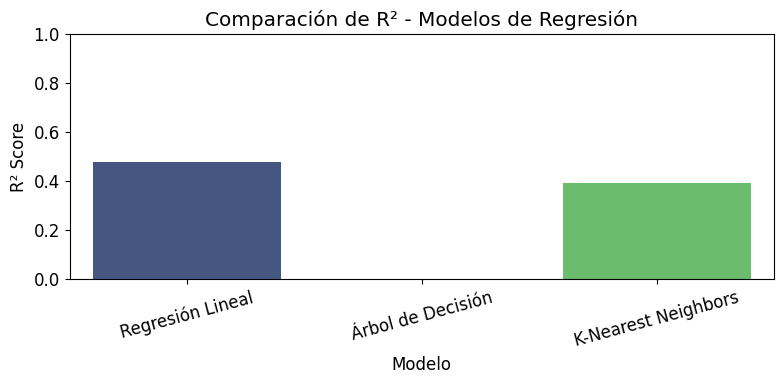

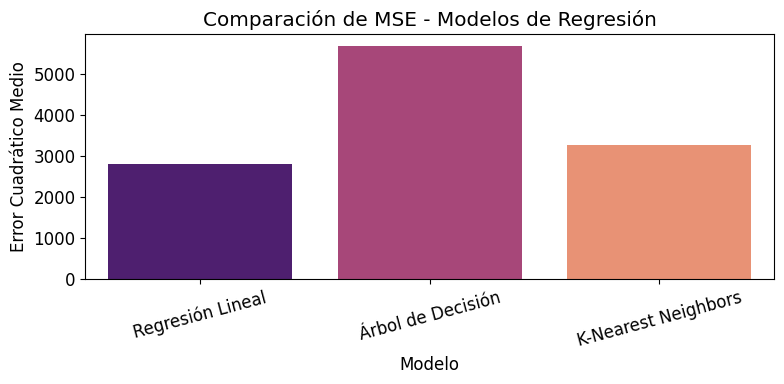

In [28]:
# Guardar resultados en listas
nombres_modelos = []
mses = []
r2s = []

for nombre, modelo in modelos_reg.items():
    pred = modelo.predict(Xr_test_scaled)
    mse = mean_squared_error(yr_test, pred)
    r2 = r2_score(yr_test, pred)

    nombres_modelos.append(nombre)
    mses.append(mse)
    r2s.append(r2)

# Crear DataFrame
df_resultados_reg = pd.DataFrame({
    'Modelo': nombres_modelos,
    'MSE': mses,
    'R²': r2s
})

# Mostrar tabla
print("Tabla Comparativa - Modelos de Regresión:\n")
display(df_resultados_reg)



# Gráfico de comparación de R²
plt.figure(figsize=(8, 4))
sns.barplot(data=df_resultados_reg, x='Modelo', y='R²', palette='viridis')
plt.title('Comparación de R² - Modelos de Regresión')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Gráfico de comparación de MSE
plt.figure(figsize=(8, 4))
sns.barplot(data=df_resultados_reg, x='Modelo', y='MSE', palette='magma')
plt.title('Comparación de MSE - Modelos de Regresión')
plt.ylabel('Error Cuadrático Medio')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Ridge y Lasso**

Resultados de Modelos con Regularización:



,Modelo,MSE,R²
0,Ridge,2819.982017,0.477617
1,Lasso,2817.087638,0.478154


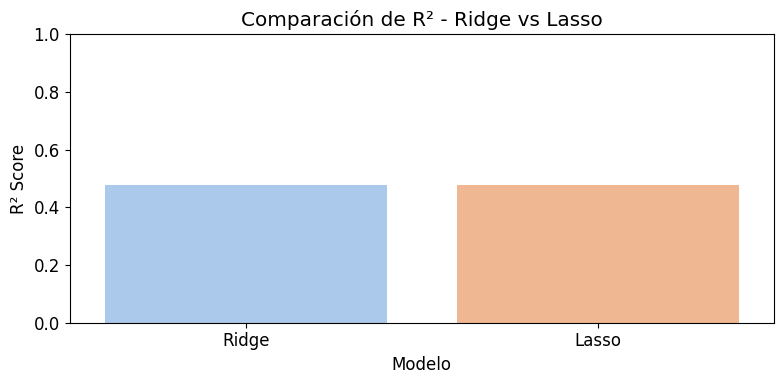

In [29]:
# Entrenar modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(Xr_train_scaled, yr_train)
ridge_pred = ridge_model.predict(Xr_test_scaled)

# Entrenar modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(Xr_train_scaled, yr_train)
lasso_pred = lasso_model.predict(Xr_test_scaled)

# Calcular métricas
ridge_mse = mean_squared_error(yr_test, ridge_pred)
ridge_r2 = r2_score(yr_test, ridge_pred)

lasso_mse = mean_squared_error(yr_test, lasso_pred)
lasso_r2 = r2_score(yr_test, lasso_pred)

# Crear tabla con resultados
df_regularizacion = pd.DataFrame({
    'Modelo': ['Ridge', 'Lasso'],
    'MSE': [ridge_mse, lasso_mse],
    'R²': [ridge_r2, lasso_r2]
})

# Mostrar tabla
print("Resultados de Modelos con Regularización:\n")
display(df_regularizacion)

#Gráfica
plt.figure(figsize=(8, 4))
sns.barplot(data=df_regularizacion, x='Modelo', y='R²', palette='pastel')
plt.ylim(0, 1)
plt.title('Comparación de R² - Ridge vs Lasso')
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()

**Análisis de Modelos de Regresión con Regularización**

Se evaluaron dos modelos de regresión regularizados: **Ridge** y **Lasso**, con el objetivo de mejorar la capacidad predictiva y reducir el sobreajuste. Ambos modelos fueron entrenados con los mismos datos escalados y evaluados con las métricas **MSE** (Error Cuadrático Medio) y **R²** (coeficiente de determinación).

Observaciones:
- **R² (R cuadrado)** mide qué tan bien se ajusta el modelo a los datos; mientras más cercano a 1, mejor es el ajuste.
- En este caso, ambos modelos alcanzaron un desempeño similar, con **Ridge** obteniendo un R² ≈ 0.478 y **Lasso** un R² ≈ 0.478 también.
- Esto indica que la regularización no tuvo un impacto significativo en el rendimiento, lo cual puede deberse a que el modelo base (regresión lineal simple) ya era suficientemente adecuado para estos datos.

Conclusión:
Ambos métodos funcionan de manera comparable en este caso, aunque **Lasso** puede ser preferi


**Optimización**

In [30]:
# Ridge Regression
param_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_ridge, cv=5)
grid_ridge.fit(Xr_train_scaled, yr_train)
best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(Xr_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(yr_test, y_pred_ridge))
r2_ridge = r2_score(yr_test, y_pred_ridge)
print(f"Ridge - Mejor alpha: {grid_ridge.best_params_}")
print(f"  RMSE: {rmse_ridge:.2f} | R²: {r2_ridge:.4f}")

# Lasso Regression
param_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(Lasso(max_iter=10000), param_lasso, cv=5)
grid_lasso.fit(Xr_train_scaled, yr_train)
best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(Xr_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(yr_test, y_pred_lasso))
r2_lasso = r2_score(yr_test, y_pred_lasso)
print(f"Lasso - Mejor alpha: {grid_lasso.best_params_}")
print(f"  RMSE: {rmse_lasso:.2f} | R²: {r2_lasso:.4f}")

Ridge - Mejor alpha: {'alpha': 1}
  RMSE: 53.10 | R²: 0.4776
Lasso - Mejor alpha: {'alpha': 0.1}
  RMSE: 53.08 | R²: 0.4782


Tabla comparativa y gráfico de barras

Tabla Comparativa de Modelos de Regresión:


,Modelo,RMSE,R²
0,Ridge,53.103503,0.477617
1,Lasso,53.076244,0.478154


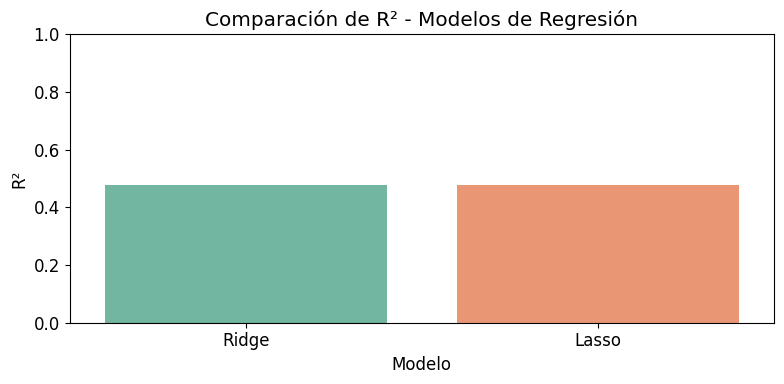

In [31]:
# Crear diccionario de resultados
resultados_regresion = {
    'Modelo': ['Ridge', 'Lasso'],
    'RMSE': [rmse_ridge, rmse_lasso],
    'R²': [r2_ridge, r2_lasso]
}

# Convertir a DataFrame
df_resultados_reg = pd.DataFrame(resultados_regresion)
print("Tabla Comparativa de Modelos de Regresión:")
display(df_resultados_reg)

# Gráfico comparativo de R²
plt.figure(figsize=(8, 4))
sns.barplot(data=df_resultados_reg, x='Modelo', y='R²', palette='Set2')
plt.title('Comparación de R² - Modelos de Regresión')
plt.ylim(0, 1)
plt.ylabel('R²')
plt.tight_layout()
plt.show()


**Conclusiones Finales**

* **Clasificación (Wine Dataset)**

Se evaluaron tres modelos de clasificación: **Regresión Logística**, **K-Nearest Neighbors** y **Árbol de Decisión**. Los resultados mostraron que:

- **Regresión Logística** obtuvo la mayor precisión (`accuracy`) con un **98.15%**, mostrando un rendimiento sobresaliente y generalizando bien en los datos de prueba.
- **KNN** y **Árbol de Decisión** también alcanzaron una alta precisión del **96.3%**, con ligeras diferencias en sus métricas de recall y f1-score según la clase.

*Conclusión*: La **Regresión Logística** fue el mejor modelo para esta tarea de clasificación, según el balance entre precisión, estabilidad y simplicidad.

---

**Regresión (Diabetes Dataset)**

Se compararon dos modelos de regresión regularizada:

- **Ridge Regression**, con mejor alpha = 1  
  - RMSE: **53.10**
  - R²: **0.4776**

- **Lasso Regression**, con mejor alpha = 0.1  
  - RMSE: **53.08**
  - R²: **0.4782**

Ambos modelos mostraron un desempeño muy similar, con ligeras ventajas para Lasso en R² y para Ridge en RMSE.

*Conclusión*: Ambos modelos son adecuados, pero **Lasso** ofrece una ligera mejora en la capacidad explicativa del modelo (R²), además de favorecer la selección de variables, lo cual puede ser útil en futuros análisis.

